# Problem z pakowaniem pojemników  z pomocą AG
(Bin packing problem)

<p align="center">
  <img width="660" height="300" src="https://scipbook.readthedocs.io/en/latest/_images/bpp-instance.png">
</p>

W przypadku problemu pakowania w pojemniki przedmioty o różnej objętości muszą być pakowane w liczbę pojemników, z których każdy ma określoną objętość w sposób minimalizujący liczbę używanych pojemników. 

W teorii złożoności obliczeniowej jest to kombinatoryczny problem <b>NP</b> - trudny.

<p align="center">
  <img width="660" height="300" src="https://scipbook.readthedocs.io/en/latest/_images/bpp-solution.png">
</p>

Spróbujmy rozwiązać ten problem za pomocą <b>Algorytmu Genetycznego</b>.

Jednak przed przystąpieniem do projektu postanowiłem uzupełnić braki wiedzy i kupiłem książkę: ["Genetic Algorithms with Python" by Clinton Sheppard](https://leanpub.com/genetic_algorithms_with_python)

(Jeśli ktoś jest zainteresowany, mogę wysłać książkę jako osobistą wiadomość w formacie .pdf)

# Sekwencja działań algorytmu

Najczęściej działanie algorytmu przebiega następująco:

* Losowana jest pewna populacja <i>początkowa</i>
* Selekcja
* Krzyżowanie
* Mutacja
* Rodzi się drugie (kolejne) pokolenie
* Jeśli znajdziemy wystarczająco dobre rozwiązanie, wybieramy najlepszego osobnika z populacji - jego genotyp to uzyskany <b>wynik</b>.

In [1]:
from collections import Counter # rodzaj słownika, który pozwala policzyć liczbę niezmiennych obiektów

import numpy as np
import matplotlib.pyplot as plot

# Populacja

W dowolnym momencie algorytm genetyczny przechowuje populację osobników - zbiór potencjalnych rozwiązań danego problemu.

In [2]:
n = 100 # liczba przedmiotów, które chcemy zmieścić w kontenerach

In [3]:
v = np.random.random(size = n) # objetości tych przedmiotów
np.round(v, 3)

array([0.084, 0.092, 0.716, 0.73 , 0.868, 0.152, 0.074, 0.341, 0.049,
       0.326, 0.012, 0.794, 0.055, 0.903, 0.564, 0.4  , 0.702, 0.075,
       0.89 , 0.04 , 0.22 , 0.873, 0.315, 0.655, 0.412, 0.329, 0.583,
       0.678, 0.039, 0.613, 0.203, 0.621, 0.948, 0.736, 0.252, 0.013,
       0.196, 0.458, 0.742, 0.597, 0.983, 0.205, 0.704, 0.092, 0.868,
       0.082, 0.929, 0.622, 0.075, 0.661, 0.919, 0.463, 0.789, 0.287,
       0.04 , 0.875, 0.94 , 0.955, 0.727, 0.771, 0.864, 0.609, 0.733,
       0.9  , 0.842, 0.477, 0.99 , 0.33 , 0.308, 0.769, 0.861, 0.703,
       0.396, 0.275, 0.399, 0.726, 0.392, 0.639, 0.106, 0.159, 0.786,
       0.766, 0.014, 0.854, 0.429, 0.603, 0.317, 0.909, 0.622, 0.725,
       0.215, 0.87 , 0.563, 0.023, 0.091, 0.19 , 0.818, 0.796, 0.994,
       0.07 ])

In [4]:
v_max = 3 # maksymalna objetość każdego kontenera

Stąd mamy obiekty o pewnej objętości $v_i$, $i=1,...,n$ i dowolną liczbę kontenerów, każdy o pojemności <i>v_max</i>.

<i>Jaka jest najmniejsza liczba kontenerów potrzebna, by spakować wszystkie obiekty?</i>

# Rozwiązania w populacji

Reprezentacja załadowania $nr$_$kontenera()$ :
* $[i_1,i_2,\dots,i_n]$,  gdzie $i_k$ oznacza № kontenera, w którym jest obiekt $k$.

In [5]:
def nr_kontenera(): # konfiguracja numerów kontenera
    return np.random.randint(n, size=n) # wybrany losowo

print(nr_kontenera())

[42 21 50 38 10 66 76 23 22  9 39 88 96 22 46 15 36 18 17 34 80 24 10  2
 90 94 90 13 28 82 50 13 41 95 42 77 36 50 92 68 89 92 76 72 48 96 90 16
 65 44 40 35 65 91 62 12 74 86  5 33  5 23 75 52 16 81 21 47 53 28 42 22
 73 73 73 18 64 26 87  9 72 10 32 33  9 85 44 87 89 97 98 12 74 29 33 45
 19 91 95 96]


# W rozwiązaniu tego problemu pomoże nam ludność całego miasta

In [6]:
population_size = 2000 # populacja początkowa 100000 osobników 

# każda osoba z populacji wybiera własną konfigurację numerów kontenerów 
population = np.array([nr_kontenera() for _ in range(population_size)])
population 

array([[88,  4,  5, ..., 64, 61, 21],
       [12, 68, 86, ..., 68, 55, 84],
       [29, 98,  9, ..., 12, 60, 95],
       ...,
       [77, 91, 71, ..., 92,  1, 37],
       [69, 34, 56, ...,  1, 86, 50],
       [92, 62, 19, ..., 42, 62, 29]])

In [7]:
population_popu = [ ]
for i in range(population_size):
    population_popu.append(population[i])

In [8]:
population_popu[0]

array([88,  4,  5, 50, 63, 77, 10, 17, 75, 13, 55, 52, 77, 45, 65, 92, 48,
       67, 79, 57, 69, 19, 28, 14, 27, 17, 34, 37, 81, 39, 67, 93, 80, 94,
       34, 88, 16, 42, 89, 78, 24, 15, 69, 57, 66, 51, 40, 63, 14, 23, 53,
       32, 90, 25, 77, 15, 32,  9, 20, 24,  6, 22,  9, 66, 38, 54,  3, 77,
       72, 71, 28, 40, 50, 17, 40, 44, 33, 49, 32, 85, 10, 63,  6, 60, 16,
       84,  5, 16, 39, 93, 54, 85, 77, 34, 55,  1, 37, 64, 61, 21])

Liczymy liczbę użytych kontenerów za pomozą funkcji <b>quantity()</b>

In [9]:
def quantity(nr_kontenera):                
    myDict = Counter(nr_kontenera) # Counter - rodzaj słownika, który pozwala policzyć liczbę niezmiennych obiektów
    return len(myDict) # liczba unikalnych elementów == liczba użytych kontenerów !!!

quantity(population_popu[0]) # Pierwsza osoba z populacji wybrała X kontenery

64

Obliczamy zużytą objętość każdego pojemnika, która została wybrana przez każdą osobę z populacji za pomozą funkcji <b>volume()</b>

In [10]:
def volume(nr_kontenera):  
    ress_final = []    
    ress = []
    for j in range(n):
        nr_kont = nr_kontenera[j]
        summ = 0        
        for u in range(n):
            if nr_kont == nr_kontenera[u]: # jeśli przedmioty należą do jednego pojemnika, sumuje się ich objętość !!!
                summ += v[u]             
        ress.append(summ)
    new_ress = list(set(ress))
    ress_final.append(new_ress)
    return ress_final

Wykorzystana objętość pojemników przez pierwszą osobę:

In [11]:
alll = volume(population_popu[0])
NEW_alll = alll[0]
NEW_alll # liczba elementów NEW_alll == liczba użytych kontenerów !!!

[0.09611799636837237,
 0.09200383599611173,
 2.255821435907266,
 1.1260016536457877,
 1.0325208769609642,
 1.140525391027889,
 0.860690701495315,
 0.9446304793371281,
 0.048664100457634474,
 0.3260039840791208,
 1.1764357238105205,
 1.4957189845859205,
 0.4579658403641833,
 0.5974802960944335,
 1.080288693671342,
 1.7677188509874586,
 0.7893428847235847,
 0.9483262692006156,
 0.6091492895245346,
 0.8537656245065968,
 0.7956249581650303,
 0.18989446244139774,
 1.5330431182496478,
 1.5093101626676122,
 1.6873505381571159,
 0.8902356581665692,
 0.13122865954792606,
 0.412066747483124,
 0.7421118123601275,
 0.6919649422743358,
 0.9895440940275758,
 0.6613724399597953,
 0.6032261741782379,
 0.9245110632963597,
 0.8731674274652518,
 2.031263563204629,
 0.2778155187991984,
 0.8779099203737442,
 0.8424825526159612,
 0.7693564283037098,
 0.0704974716269351,
 1.7534268199454306,
 0.7262584400765036,
 0.08161388592277508,
 0.918599679763795,
 0.391744306453373,
 1.2342056543667104,
 0.99414388333

Do tablicy <b>numerów</b> dodajemy <b>liczbę</b> użytych kontenerów :

In [12]:
nr_count = [[nr_kontenera, quantity(nr_kontenera)] for nr_kontenera in population_popu]
#nr_count

In [13]:
nr_count[1]

[array([12, 68, 86, 44, 61, 51, 31,  0,  9, 98, 80, 93, 37, 73,  7, 50, 52,
        84, 40, 26, 64,  9, 75, 45, 24, 23, 17, 97,  6,  1, 64, 96, 60,  7,
        12, 92, 78,  8, 16,  4, 49, 45, 12, 93, 69, 84, 24,  5,  4, 72, 54,
        61, 61, 96, 50, 66, 16, 85, 60,  2, 55, 86, 78,  7, 61, 78, 47, 95,
         3, 54, 53, 63, 34, 41, 13, 59, 48, 97, 23, 60, 41, 76, 81, 88, 58,
        50, 27, 45, 30,  2, 38, 20, 46, 41, 63, 84, 31, 68, 55, 84]),
 64]

Sortowanie według liczby zużytych pojemników (rosnąco):

In [14]:
sort = sorted(nr_count, key=lambda x: x[1]) 
sort[0]

#można uruchomić i zobaczyć, jaki jest wynik

[array([67,  6, 84, 62, 42, 57,  9, 55, 91, 59,  3, 44,  3, 94, 42,  0, 17,
        82, 25,  3, 66, 83, 34, 94, 79, 61, 49, 53, 19, 20, 60, 22,  3, 99,
        35, 32, 62, 66, 29, 39, 22, 32, 97, 38, 60, 29, 27, 82, 32, 49, 44,
        79,  1, 92, 72,  7, 51,  9, 11, 34, 98, 91, 78, 27, 11, 78, 35, 96,
        49, 44, 11, 42, 20, 20, 51, 96, 31, 25,  3, 12, 90,  4, 59, 83, 97,
        14, 25, 28,  0, 86, 22, 94, 49, 99, 55, 84,  3, 30, 99, 57]),
 53]

In [15]:
sort_sort_sort = []
for i in range(100):
    sort_sort_sort.append(i)

# Selekcja

Po obliczeniu sprawności wszystkich osobników w populacji rozpoczyna się proces <b>selekcji</b>, który określa, które osobniki zostaną pozostawione do <b>reprodukcji</b>, czyli stworzenie potomstwa, które będzie stanowić następne pokolenie.

In [16]:
def selection(popu, n_best):
    sel = [] 
    sort_s = []
    sort_sort = []      
    sel_summ = [[]]
    sel_quant = []
    k = 0 
    t = 0        
    
    com = [[nr_kontenera, quantity(nr_kontenera)] for nr_kontenera in popu]
    popu_c = sorted(com, key=lambda x: x[1])
    sort_summ = [x[0] for x in popu_c]   
    
    for j in range(len(sort_summ)):
        # Pozostawiamy tylko te kombinacje, które spełniają warunek:
        # Objętość pojemników nie przekracza dopuszczalnej wartości
        wynik = all(item <= v_max for item in volume(sort_summ[j])[0])
        if wynik == True:          
            sel_summ = np.append(sel_summ, sort_summ[j])  
            sel_quant = np.append(sel_quant, quantity(sort_summ[j]))
            t += 1
        sel_summ=np.reshape(sel_summ,[t,n])
        sel_summ=sel_summ.astype(np.int) 
        sel_quant=np.reshape(sel_quant,[t,1])
        sel_quant=sel_quant.astype(np.int) 
        
        
    # wybieramy preferencyjnie kontenery o najniższych numerach    
    for i in range(t): 
        if k==n_best+1:
            break
        if i < t - 1:

            if sel_quant[i] == sel_quant[i+1]:  
                # Dla każdej konfiguracji tworzymy sumę po numerach kontenerów
                if sum(sel_summ[i]) < sum(sel_summ[i+1]):
                    sort_s = sel_summ[i]
                    

                elif sum(sel_summ[i]) > sum(sel_summ[i+1]):
                    sort_s = sel_summ[i+1] 
                      
                else:                    
                    continue

            else:
                if len(sort_s) != 0 :
                    k += 1
                    sort_sort= np.append(sort_sort, sort_s) 
                    sort_sort2=np.reshape(sort_sort,[k,n])
                    continue
                    
                else:
                    sort_s = sel_summ[i]  
                    
    sort_sort2 = np.delete(sort_sort2, sort_sort_sort) 
    sort_sort2=np.reshape(sort_sort2,[k-1,n])
   
        
    return sort_sort2.astype(np.int) 

In [17]:
# test
population2=selection(population_popu, 3) # wybranie 3 najlepszych
print(population2)

[[59 49 64 93 32 25 88 18 25 40 51 40 66 93 39 39 82 19 75 99 20 10 66 62
  72 90 10 70 18 46  2 73 70 36 56 17 98 20 86 26 10 49 19 64 39 65 54 49
  75 99 39 96  5  7 86 38 46 66 26  3 20 59 62 60 23 23 89 23 31 18 61 93
  93 70  1 12 92 72 88  7 68 12 19 17 99 44 18 23 11 11 50 97 44 16 29 60
  56 60 50 18]
 [42 30 93 73 30  8 96 93 50 14 97 37 14 24 71 82 54 11 37 34 53 48 76 96
  95 93 17 93 68 76 98 19 86 89 55 38  7 13 36 63  6 34 76 58 59 17 83 32
  90 10 10 88 19  7 89 99  6 25 90 18 24 34 86 14 66 13 50 38 86 71 63 17
   4 37 12 82 14 80 98 19 64 16 52 22 30 65 82 59 23 13  8  2 93 82 88 80
  80 68 68 79]
 [ 0 89 97 45 87 48 72 80 97 30 82 26 77 73 45  4 67 79 39 36 74 89 57 42
  89 18 97 42 29 58 79 40  6 85  5 85 18 94 13 67 51 16 97  3 80 29 24 51
  90 23 95 33 49 80 73 93 84 72 32 91  3 26 21 15 29 29 49 94 33 54 40  0
  75 95 13 18 94 54 36 13 71 60 90 77 45 93 38 67 23 41 94 92 77 22  4  3
  43 63 11 72]]


Następnie tworzymy tabelę składającą się z 3 elementów:
* Numer kontenera 
* Liczba używanych kontenerów
* Użyta objętość każdego pojemnika

In [18]:
nr_quantity_volume = [[nr_kontenera, quantity(nr_kontenera), volume(nr_kontenera)] for nr_kontenera in population2]
#nr_quantity_volume

# można uruchomić i zobaczyć, jaki jest wynik

# Mutacja

Celem operatora mutacji jest okresowa, losowa aktualizacja populacji, to znaczy wprowadzenie nowych kombinacji genów do chromosomów, stymulując tym samym poszukiwania w niezbadanych obszarach przestrzeni rozwiązań.

In [19]:
def mutation(nr_kontenera, probability): # nr_kontenera - osobnik, p - prawdopodobieństwo zajścia mutacji 
    if np.random.random() < probability:
        ind1=np.random.randint(n) 
        ind2=np.random.randint(n) 
#        print(ind)
        nr_kontenera[ind1]=nr_kontenera[ind2] 
    return nr_kontenera

In [20]:
print(population2[0])

[59 49 64 93 32 25 88 18 25 40 51 40 66 93 39 39 82 19 75 99 20 10 66 62
 72 90 10 70 18 46  2 73 70 36 56 17 98 20 86 26 10 49 19 64 39 65 54 49
 75 99 39 96  5  7 86 38 46 66 26  3 20 59 62 60 23 23 89 23 31 18 61 93
 93 70  1 12 92 72 88  7 68 12 19 17 99 44 18 23 11 11 50 97 44 16 29 60
 56 60 50 18]


Wynik uzyskany po <i>mutacji</i> losowej :

In [21]:
print(mutation(population2[0], 0.8)) # prawdopodobieństwo mutacji = 0.8

[59 49 64 93 32 25 88 18 25 40 51 40 66 93 39 39 82 19 75 99 20 10 66 62
 72 90 10 70 18 46  2 73 70 36 56 17 98 20 86 26 10 49 19 64 39 65 54 49
 75 99 39 96  5  7 86 38 46 66 26  3 20 59 62 60 23 23 89 23 31 18 61 93
 93 70  1 20 92 72 88  7 68 12 19 17 99 44 18 23 11 11 50 97 44 16 29 60
 56 60 50 18]


# Krzyżowanie

Aby stworzyć parę nowych osobników, zazwyczaj wybiera się rodziców z obecnego pokolenia, a części ich chromosomów są zamieniane (krzyżowane), w wyniku czego powstają dwa nowe chromosomy reprezentujące potomstwo.

In [22]:
def crossover(father, mother): # dwoje rodziców
    cut=np.random.randint(1,n) # losowe miejsce przecięcia chromosomu 
    chp=np.delete(father, np.arange(cut, n, 1))
    chm=np.delete(mother, np.arange(0,cut, 1))
    child=np.concatenate((chp,chm),axis=0) # dziecko
    mutation(child, 0.8) # losowa mutacja
    return child # dziecko (potomstwo)

## Czas stworzyć dynastię

In [23]:
n_children = 3*population_size # liczebność dzieci

In [24]:
def generation(population_def, population_size_def):      
    children=np.array([crossover(population_def[np.random.randint(0,len(population_def))],\
                             population_def[np.random.randint(0,len(population_def))]) for _ in range(n_children)])
                                  
    family = np.concatenate((population_def,children)) # dodanie dzieci do populacji rodziców

    return selection(family, population_size_def)

Narodziny kolejnych X pokoleń, których rozwiązania są unikalne.
Wybieramy tylko to, co najlepsze w każdym pokoleniu.

In [25]:
for _ in range(200):
    population = generation(population, population_size)
    quan = quantity(population[0]) # Minimalna liczba używanych kontenerów   
    print(quan, end=' ')

53 52 52 52 52 52 51 50 49 49 49 49 49 48 47 47 46 46 46 45 45 45 45 44 44 44 44 44 43 43 42 41 41 40 40 40 40 40 40 40 40 40 40 40 40 39 39 39 39 39 39 39 40 39 39 38 38 37 37 37 36 36 36 35 35 35 35 35 36 36 36 37 35 35 34 34 35 35 35 35 35 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 36 35 35 35 35 35 35 35 35 35 35 35 35 34 34 34 34 34 34 34 34 34 34 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 34 34 34 34 34 34 34 34 35 34 34 34 34 33 33 33 33 33 33 33 33 33 33 33 33 33 33 34 34 34 34 34 34 34 34 34 35 35 35 35 35 35 35 35 35 35 35 35 35 35 35 34 34 34 34 34 34 

In [26]:
population1 = population
for _ in range(100):
    population1 = generation(population1, population_size)
    quan = quantity(population1[0]) # Minimalna liczba używanych kontenerów   
    print(quan, end=' ')

34 34 34 34 33 33 33 33 33 33 33 33 33 33 33 33 33 33 32 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 32 32 32 32 32 32 32 32 32 32 32 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 32 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 

In [31]:
population2 = population1
for _ in range(100):
    population2 = generation(population2, population_size)
    quan = quantity(population2[0]) # Minimalna liczba używanych kontenerów   
    print(quan, end=' ')

31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 30 30 30 30 30 30 29 29 29 29 29 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 27 27 27 27 27 27 27 

# ! Przychodzi czas, kiedy liczba pokoleń jest zbyt duża i pojawia się błąd:
    * index 0 is out of bounds for axis 0 with size 0

In [36]:
population3 = population2
for _ in range(100):
    population3 = generation(population3, population_size)
    quan = quantity(population3[0]) # Minimalna liczba używanych kontenerów   
    print(quan, end=' ')

27 27 27 27 27 27 27 27 27 27 28 28 28 28 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 

IndexError: index 0 is out of bounds for axis 0 with size 0

### * Średnio (przy różnej liczbie populacji i pokoleń) uzyskuje się wartość około 30 pojemników.
### * W tej chwili mój rekord to 25 kontenerów
### * Jednak wykres pokazuje, że wciąż jest dużo wolnego miejsca.

In [32]:
print(population2[0])

[ 0  0  1  0 22  0  3 15  0  7  0 16  5  3 15  5 14  1 16  0  1  6 11  1
  1  3 11 24  1  2  7  6  6 15  2  6  7 10  5  7 18  0 18  7 42  3 30  1
  4 16 10  3 34 11  4 30 11  8 10 12  4 35  2 13 12 10  5  5  8  7 17  4
  3  2 13 17  6  3  1  2  0  4  2 12  9 19  0  8  7  2  0  9 11  0 15  0
 21 14  9  6]


Uczyńmy nazwy zmiennych w bardziej reprezentatywnej formie

In [33]:
final_volume = [volume(population2[0]) for _ in volume(population2[0])]
quant = quantity(population2[0]) # Minimalna liczba używanych kontenerów

final_volume2 = [] 
for i in range(quant):
    final_volume2.append(final_volume[0][0][i]) # Używana objętość każdego pojemnika    

In [34]:
print('\nMinimalna liczba używanych kontenerów: ', quant)

#print('\nUżywana objętość każdego pojemnika, nie przekraczająca dopuszczalnej:')
#final_volume2


Minimalna liczba używanych kontenerów:  27


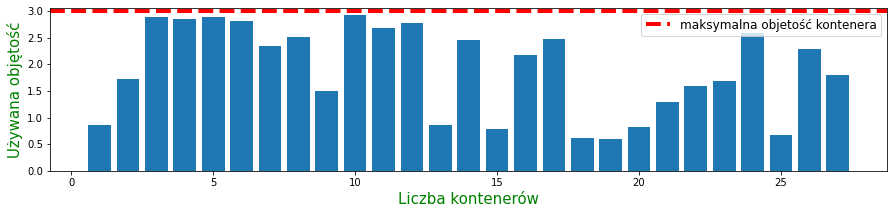

In [35]:
plot.figure(figsize=(15, 3))
x = np.arange(quant) # Liczba używanych kontenerów
plot.bar(x+1, height = final_volume2)

# rysowanie linii poziomej == maksymalna objetość każdego kontenera
plot.axhline(y = v_max, color = 'r', linewidth=4, linestyle = '--', label='maksymalna objetość kontenera')  

plot.xlabel('Liczba kontenerów', fontsize=15, color='green')
plot.ylabel('Używana objętość', fontsize=15, color='green')

#plt.grid()
plot.legend(fontsize=12)
plot.show()

# Wniosek

Korzystając z Algorytmu Genetycznego, staraliśmy znaleźć minimalną liczbę pojemników wymaganych do spakowania wszystkich przedmiotów (mniej niż $1/3$ ogólnej liczby). Istnieje jednak duże prawdopodobieństwo, że to rozwiązanie nie jest najbardziej optymalne (jak widać na wykresie, <i>nie wszystkie</i> słupki osiągają maksimum.). Ale w przypadku problemów ze złożonością kombinatoryczną NP, takie podejście jest całkiem uzasadnione.

# Źródła inspiracji:

* <b>Materiał</b> z Wykładu cz. II i IV (Algorytmy ewolucyjne)
* <b>Genetic Algorithms with Python</b> by Clinton Sheppard
* <b>Hands-On Genetic Algorithms with Python</b> by Eyal Wirsansky